In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_csv(r"C:\Users\hp\Downloads\movie_review_data\movie_review_data.csv")

In [3]:
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [4]:
df.shape

(5043, 28)

In [5]:
df.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [6]:
#Dropping few irrelevant columns using domain knowledge

df = df.drop(['color', 'director_name', 'actor_2_name', 'actor_1_name', 'movie_title', 'actor_3_name', 
        'director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'movie_imdb_link',
        'cast_total_facebook_likes', 'facenumber_in_poster', 'title_year', 'actor_2_facebook_likes', 'aspect_ratio', 'content_rating'], axis =1)

In [7]:
df.head(5)

,num_critic_for_reviews,duration,gross,genres,num_voted_users,plot_keywords,num_user_for_reviews,language,country,budget,imdb_score,movie_facebook_likes
0,723.0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,886204,avatar|future|marine|native|paraplegic,3054.0,English,USA,237000000.0,7.9,33000
1,302.0,169.0,309404152.0,Action|Adventure|Fantasy,471220,goddess|marriage ceremony|marriage proposal|pi...,1238.0,English,USA,300000000.0,7.1,0
2,602.0,148.0,200074175.0,Action|Adventure|Thriller,275868,bomb|espionage|sequel|spy|terrorist,994.0,English,UK,245000000.0,6.8,85000
3,813.0,164.0,448130642.0,Action|Thriller,1144337,deception|imprisonment|lawlessness|police offi...,2701.0,English,USA,250000000.0,8.5,164000
4,NaN,NaN,NaN,Documentary,8,NaN,NaN,NaN,NaN,NaN,7.1,0


In [8]:
df['num_critic_for_reviews'].isnull().sum()

50

In [9]:
mean_value = df['num_critic_for_reviews'].mean()
df['num_critic_for_reviews'].fillna(mean_value, inplace=True)

In [10]:
df['duration'].isnull().sum()

15

In [11]:
df['plot_keywords'].isnull().sum()

153

In [12]:
fill_value = 'Unknown'
df['plot_keywords'].fillna(fill_value, inplace=True)

In [13]:
df['num_user_for_reviews'].isnull().sum()

21

In [14]:
df['budget'].isnull().sum()

492

In [15]:
df['language'].isnull().sum()

12

In [16]:
df['gross'].isnull().sum()

884

In [17]:
df = df.dropna(subset= ['language','duration','num_user_for_reviews'])

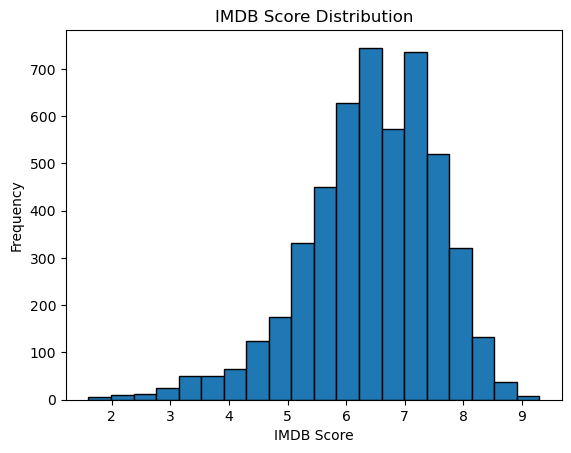

In [18]:
#Visualizing the distribution of data wrt imdb score

plt.hist(df['imdb_score'], bins=20, edgecolor='k')
plt.xlabel('IMDB Score')
plt.ylabel('Frequency')
plt.title(f'IMDB Score Distribution')
plt.show()

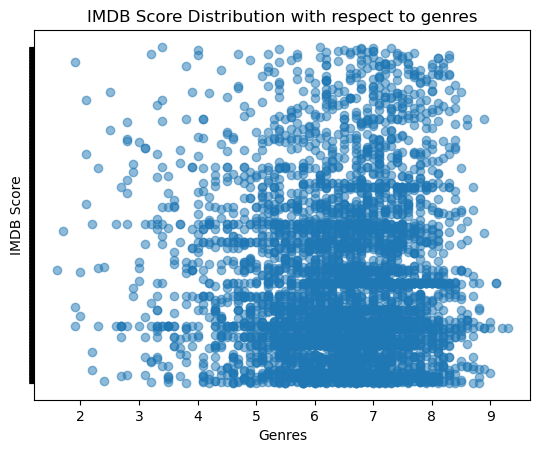

In [19]:
plt.scatter(df['imdb_score'], df['genres'], alpha = 0.5)
plt.xlabel('Genres')
plt.ylabel('IMDB Score')
plt.yticks(visible= False)
plt.title(f'IMDB Score Distribution with respect to genres')
plt.show()

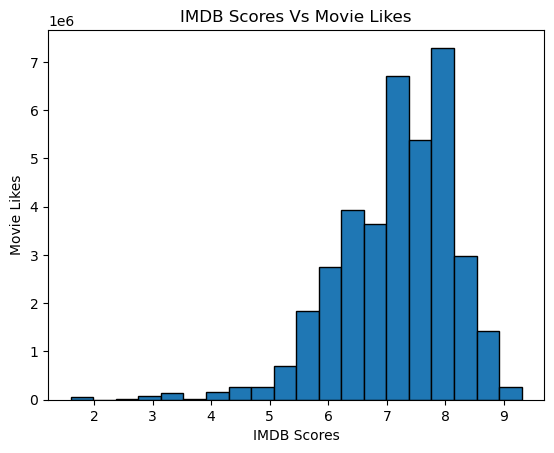

In [20]:
df.hist('imdb_score',weights=df['movie_facebook_likes'], bins=20, edgecolor='k' )
plt.grid(False)
plt.xlabel('IMDB Scores')
plt.ylabel('Movie Likes')
plt.title('IMDB Scores Vs Movie Likes')
plt.show()

Text(0.5, 1.0, 'Top Ten Countries by Average IMDb Score')

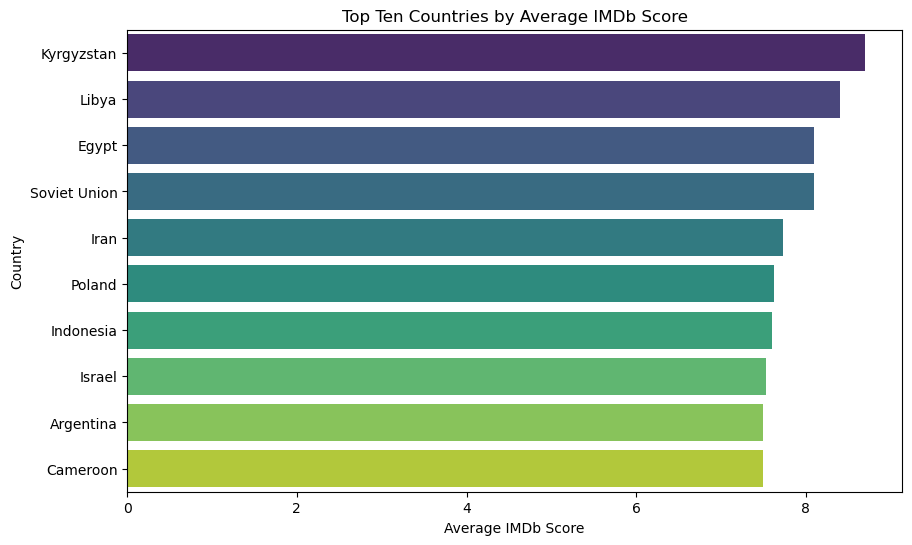

In [21]:
country_scores = df.groupby('country')[['imdb_score']].mean().reset_index()
top_ten_countries = country_scores.nlargest(10, 'imdb_score')
plt.figure(figsize=(10, 6))
sns.barplot(x='imdb_score', y='country', data=top_ten_countries, palette='viridis')
plt.xlabel('Average IMDb Score')
plt.ylabel('Country')
plt.title('Top Ten Countries by Average IMDb Score')

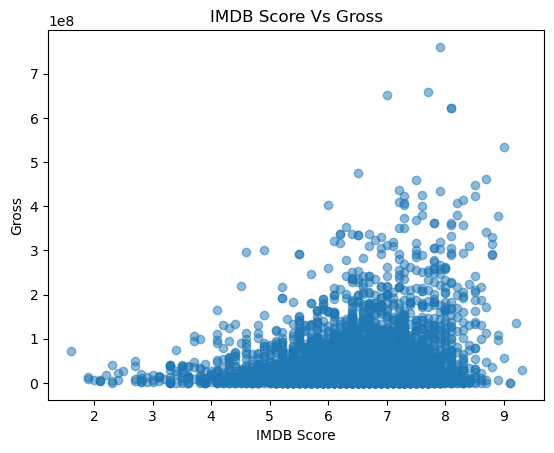

In [22]:
plt.scatter(df['imdb_score'], df['gross'], alpha =0.5)
plt.xlabel('IMDB Score')
plt.ylabel('Gross')
plt.title('IMDB Score Vs Gross')
plt.show()

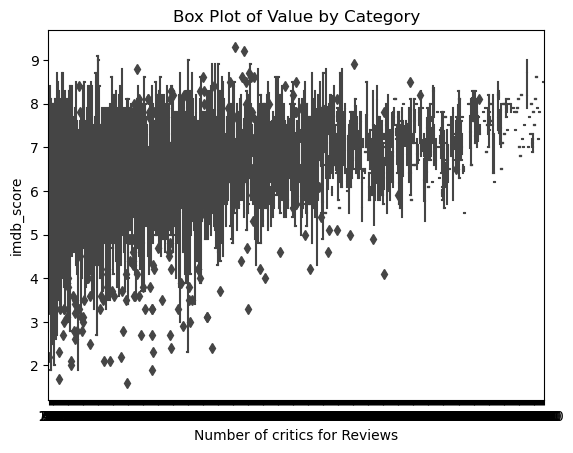

In [23]:
#Plotting Box Plot to check outliers

sns.boxplot(x='num_critic_for_reviews', y='imdb_score', data=df)
plt.xlabel('Number of critics for Reviews')
plt.ylabel('imdb_score')
plt.title('Box Plot of Value by Category')
plt.show()

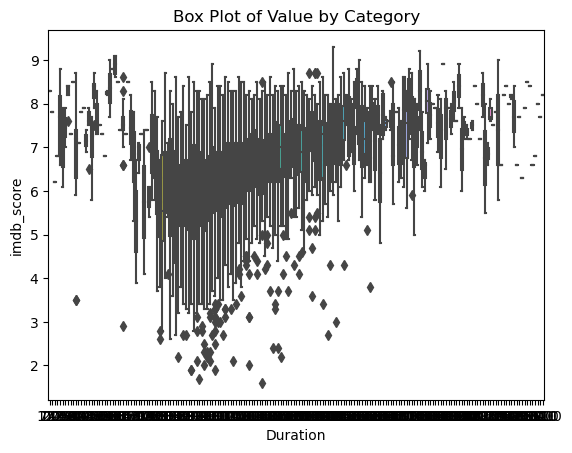

In [24]:
sns.boxplot(x='duration', y='imdb_score', data=df)
plt.xlabel('Duration')
plt.ylabel('imdb_score')
plt.title('Box Plot of Value by Category')
plt.show()

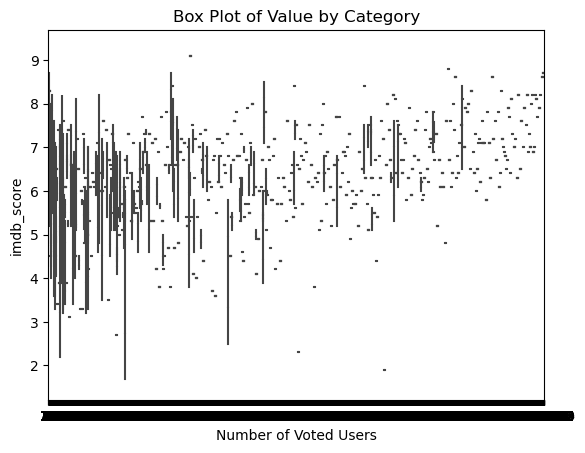

In [25]:
sns.boxplot(x='num_voted_users', y='imdb_score', data=df)
plt.xlabel('Number of Voted Users')
plt.ylabel('imdb_score')
plt.title('Box Plot of Value by Category')
plt.show()

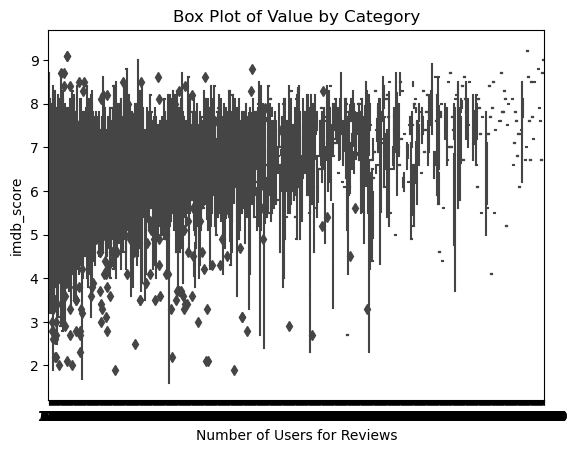

In [26]:
sns.boxplot(x='num_user_for_reviews', y='imdb_score', data=df)
plt.xlabel('Number of Users for Reviews')
plt.ylabel('imdb_score')
plt.title('Box Plot of Value by Category')
plt.show()

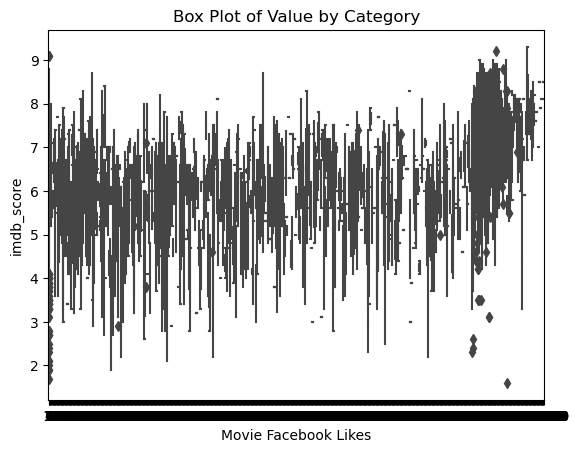

In [27]:
sns.boxplot(x='movie_facebook_likes', y='imdb_score', data=df)
plt.xlabel('Movie Facebook Likes')
plt.ylabel('imdb_score')
plt.title('Box Plot of Value by Category')
plt.show()

In [28]:
#Selecting the columns to check correlation between numerical columns and imdb Score

columns = ['imdb_score', 'num_critic_for_reviews', 'duration', 'gross', 'num_voted_users', 'num_user_for_reviews','budget','movie_facebook_likes']

In [29]:
correlation_matrix = df[columns].corr()

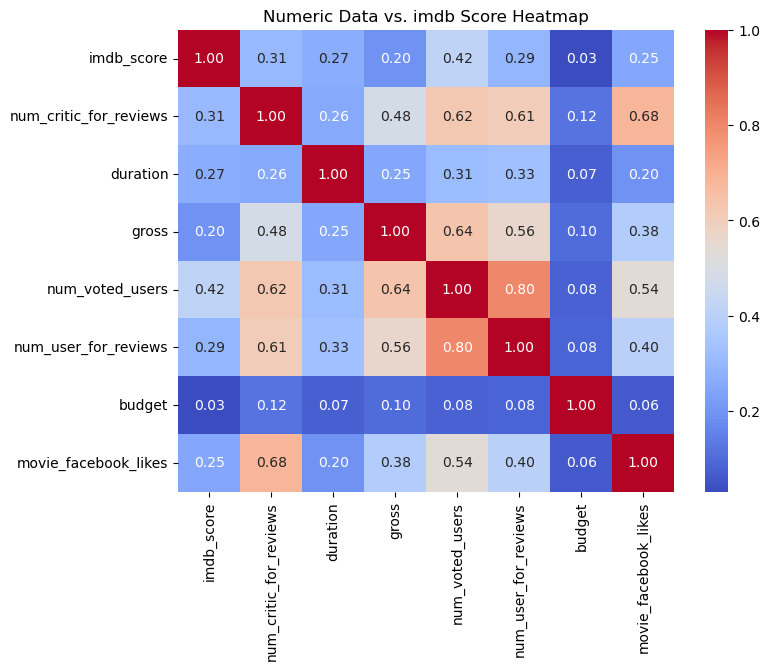

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Numeric Data vs. imdb Score Heatmap')
plt.show()

In [31]:
#Dropping the columns having low correlation

df = df.drop(['gross', 'budget'], axis =1)

In [32]:
#Encoding the categorical columns using target encoding

categorical_columns = ['genres', 'plot_keywords', 'language', 'country']

In [33]:
for col in categorical_columns:
    target_mapping = df.groupby(col)['imdb_score'].mean().to_dict()
    df[col+'_target_encoded_column'] = df[col].map(target_mapping)   

In [34]:
#Dropping original categorical columns from the dataset and keeping just the encoded columns

df = df.drop(['genres','language','country', 'plot_keywords'], axis =1)

In [35]:
#Selecting encoded categorical columns to check correlation with imdb score

columns = ['imdb_score', 'genres_target_encoded_column', 'plot_keywords_target_encoded_column', 'language_target_encoded_column', 'country_target_encoded_column']

In [36]:
correlation_matrix_categorical = df[columns].corr()

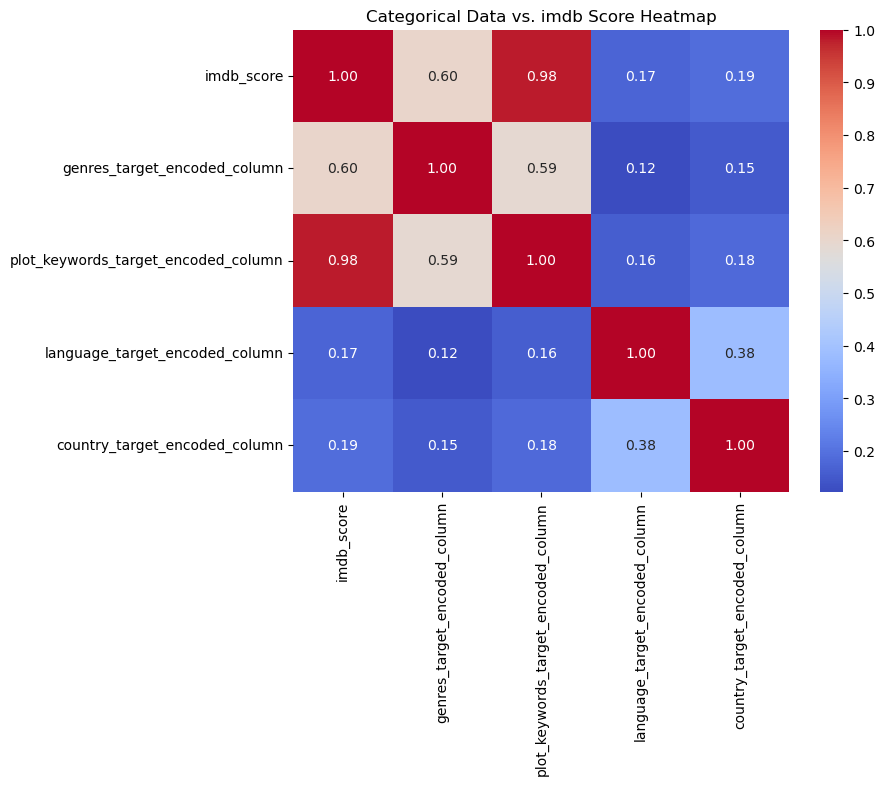

In [63]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix_categorical, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Categorical Data vs. imdb Score Heatmap')
plt.show()

In [38]:
#Dropping columns with low and high correlation

df = df.drop(['language_target_encoded_column', 'country_target_encoded_column'], axis =1)

In [39]:
df.head(5)

,num_critic_for_reviews,duration,num_voted_users,num_user_for_reviews,imdb_score,movie_facebook_likes,genres_target_encoded_column,plot_keywords_target_encoded_column
0,723.0,178.0,886204,3054.0,7.9,33000,6.891667,7.9
1,302.0,169.0,471220,1238.0,7.1,0,6.233333,7.1
2,602.0,148.0,275868,994.0,6.8,85000,6.747826,6.8
3,813.0,164.0,1144337,2701.0,8.5,164000,5.863333,8.5
5,462.0,132.0,212204,738.0,6.6,24000,6.609804,6.6


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 5042
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   num_critic_for_reviews               5000 non-null   float64
 1   duration                             5000 non-null   float64
 2   num_voted_users                      5000 non-null   int64  
 3   num_user_for_reviews                 5000 non-null   float64
 4   imdb_score                           5000 non-null   float64
 5   movie_facebook_likes                 5000 non-null   int64  
 6   genres_target_encoded_column         5000 non-null   float64
 7   plot_keywords_target_encoded_column  5000 non-null   float64
dtypes: float64(6), int64(2)
memory usage: 351.6 KB


In [41]:
#Splitting the data set into input and target columns

X = df[['num_critic_for_reviews', 'duration', 
       'num_voted_users', 'genres_target_encoded_column', 'plot_keywords_target_encoded_column', 'num_user_for_reviews']]
y = df['imdb_score']

In [42]:
#importing necessary libraries

import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import GridSearchCV,  train_test_split
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [43]:
#Creating train and validation set

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.20, random_state =42)

In [44]:
#Scaling the data

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

In [45]:
ridge_model = Ridge()

In [46]:
alpha_values = [0.01,0.09,0.1, 10, 100]

In [47]:
grid_search = GridSearchCV(estimator=ridge_model, param_grid={'alpha': alpha_values}, scoring='neg_mean_squared_error', cv=5)

In [48]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.09, 0.1, 10, 100]},
             scoring='neg_mean_squared_error')

In [49]:
best_alpha = grid_search.best_params_['alpha']
best_ridge_model = grid_search.best_estimator_

In [50]:
y_pred = best_ridge_model.predict(X_val)

In [51]:
mse = mean_squared_error(y_val, y_pred)

In [52]:
r2 = r2_score(y_val, y_pred)

In [53]:
print(f"Best Alpha: {best_alpha}")
print(f"Best Ridge Model: {best_ridge_model}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

Best Alpha: 0.1
Best Ridge Model: Ridge(alpha=0.1)
Mean Squared Error: 0.04449392429662208
R2 Score: 0.9618913842506537


In [54]:
#To check for Overfitting

residuals = y_val - y_pred

In [55]:
#Calculating the mean and std deviation to see the distribution of residuals

mean = np.mean(residuals)
std_dev = np.std(residuals)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


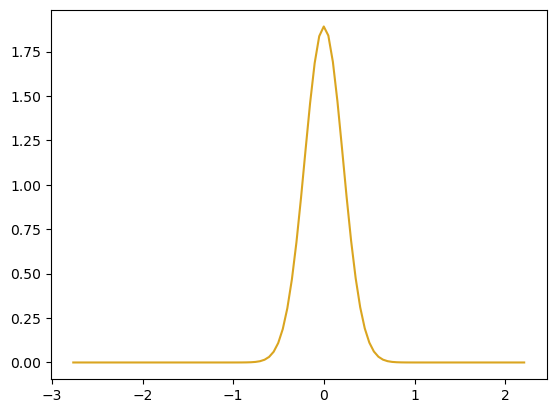

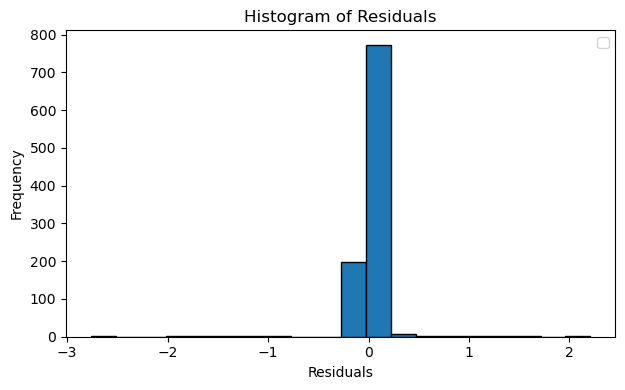

In [64]:
#plotting the graphs

x_vals = np.linspace(min(residuals), max(residuals), 100)
pdf_vals = stats.norm.pdf(x_vals, mean, std_dev)
plt.plot(x_vals, pdf_vals, color='goldenrod', label='Normal Distribution PDF')
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(residuals, bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.legend()
plt.tight_layout()
plt.show()

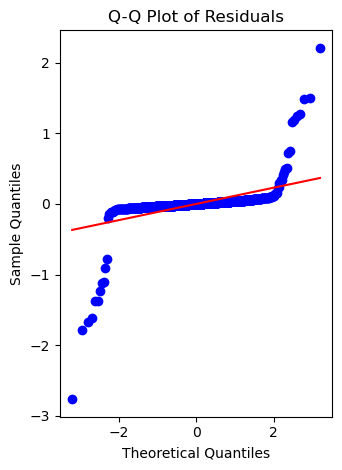

In [56]:
plt.subplot(1, 2, 2)
stats.probplot(residuals, dist="norm", plot=plt)
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.title('Q-Q Plot of Residuals')

plt.tight_layout()
plt.show()